# Visualization for PM2.5 based on time(year, month, season, cbwd/wind direction, Iws, Ls, Lr)

##### discrete PM2.5 into three states:
low:PM2.5<=35  
polluting:35<=PM2.5<=150  
high:150<PM2.5

#### 初始化

In [1]:
# 时间作为index
import pandas as pd
import numpy as np
data=pd.read_csv('PRSA_data.csv')
data = data.dropna()
data['Time'] =pd.to_datetime(data[['year','month','day']],format='%Y-%m-%d')
data.set_index('Time',inplace=True)
data=data.drop('No',1)


C:\Users\86180\AppData\Local\Temp/ipykernel_16260/3781967021.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data=data.drop('No',1)


In [2]:
# 将时间设置为索引的方法
# a  = pd.read_csv('PRSA_data.csv')
# a['Time']=pd.to_datetime(a[['year','month','day']],format='%Y-%m-%d')
# a.set_index('Time',inplace=True)

## 时间-PM2.5 关系

#### 每年PM2.5平均/中位数 折线图

In [3]:
years = data.index.year
# years = years.drop_duplicates()
pm_year_average = data['pm2.5'].groupby(years).mean()
pm_year_median = data['pm2.5'].groupby(years).median()

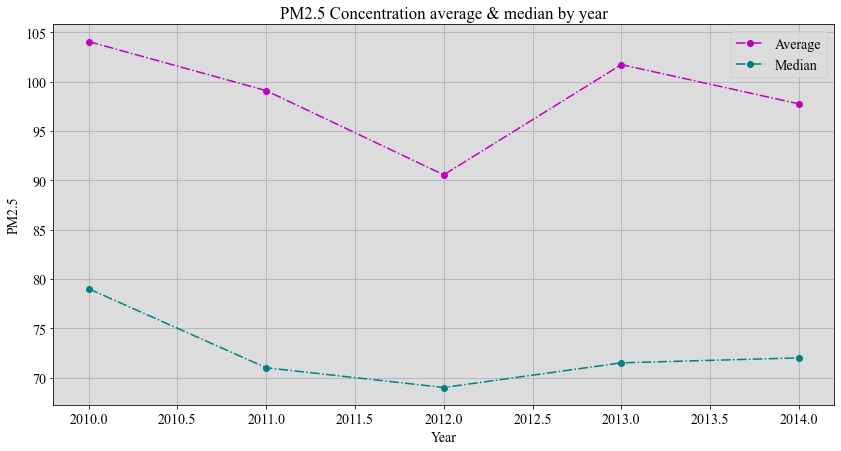

In [4]:
from matplotlib import pyplot as plt
plt.rc('figure', figsize = (14, 7))
plt.rc('font',size = 14)
plt.rc('font',family='Times New Roman')
plt.rc('axes', grid = True)
plt.rc('axes', facecolor = 'gainsboro')
plt.plot(pm_year_average.index,pm_year_average,label='Average',color='m',linestyle='-.',marker='o')
plt.plot(pm_year_median.index ,pm_year_median,label='Median',color='teal',linestyle='-.',marker='o')

plt.title('PM2.5 Concentration average & median by year')
plt.xlabel("Year")
plt.ylabel('PM2.5')
plt.legend(loc=0,ncol=1)
# plt.savefig('demo.jpg')  # 保存该图片

#### 每月PM2.5平均/中位数 折线图

In [5]:
#分类
year_months = [data.index.year,data.index.month]
pm_month_average = data['pm2.5'].groupby(year_months).mean()
pm_month_median = data['pm2.5'].groupby(year_months).median()

In [6]:
#生成月份数组
import datetime as dt
import matplotlib.dates as mdates

dateFmt = mdates.DateFormatter("%y/%m")

date1 = dt.date(2010,1,1)
date2 = dt.date(2014,12,1)
delta = dt.timedelta(days=30)
dates = mdates.drange(date1, date2, delta)
dates = dates

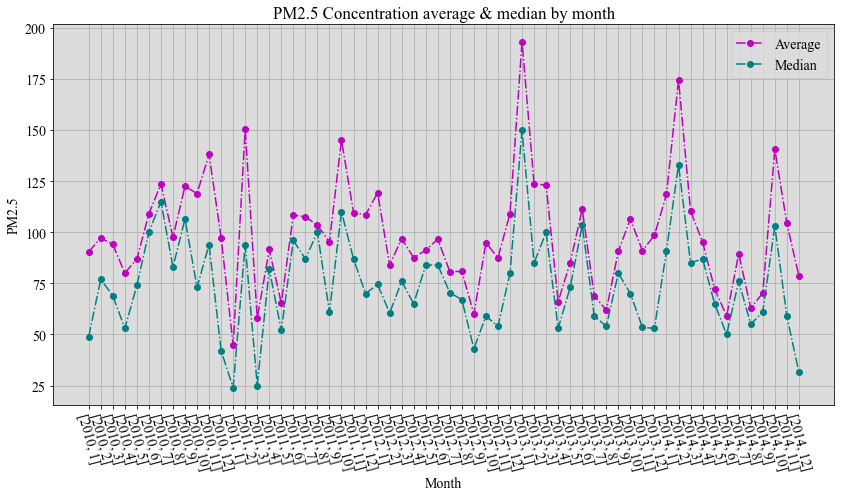

In [7]:
#画图
fig, ax = plt.subplots()
plt.rc('figure',figsize = (21,10))
plt.rc('font',family='Times New Roman')
plt.rc('axes', grid = True)
plt.rc('axes', facecolor = 'gainsboro')
ind = [ str([int(2010+np.floor(i/12)),i%12+1]) for i in np.arange(0,60)]
plt.plot( ind, pm_month_average,label='Average',color='m',linestyle='-.',marker='o')
plt.plot( ind, pm_month_median,label='Median',color='teal',linestyle='-.',marker='o')

plt.title('PM2.5 Concentration average & median by month')
plt.xlabel("Month")
plt.ylabel('PM2.5')
plt.xticks(rotation=285)
plt.legend(loc=0,ncol=1)
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

#### 每年PM2.5比例 三分类 叠加柱形图

In [8]:
#添加三个变量，对应PM2.5三状态
is_high = data['pm2.5']>150
is_polluting = (35<data['pm2.5']) & (data['pm2.5']<=150)
is_low = data['pm2.5']<=35
data['is_high']=is_high
data['is_polluting']=is_polluting
data['is_low']=is_low


In [9]:
#计算每年三种状态比例

high_year_percentage=[]
polluting_year_percentage=[]
low_year_percentage=[]

groups = data[['is_high','is_polluting','is_low']].groupby(years)
groups_list = list(groups)
#groups_list[0][0] #group dependency
#groups_list[0][1] #table for the first year

for i in range(5):
    num_high = list(groups_list[i][1]['is_high']).count(True)
    num_polluting = list(groups_list[i][1]['is_polluting']).count(True)
    num_low = list(groups_list[i][1]['is_low']).count(True)

    total_num_month = num_high+num_polluting+num_low

    high_year_percentage.append(num_high/total_num_month)
    polluting_year_percentage.append(num_polluting/total_num_month)
    low_year_percentage.append(num_low/total_num_month)

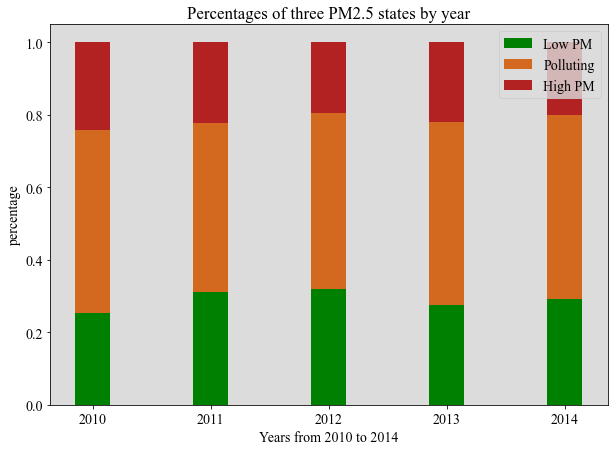

In [10]:
#画柱形图
import numpy as np
import matplotlib.pyplot as plt

plt.rc('axes', grid = False)
plt.rc('figure',figsize = (10,7))
plt.rc('font',size = 14)
fig, ax = plt.subplots()
plt.rc('axes', grid = False)
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

width =0.3   # the width of the bars: can also be len(x) sequence

ind= np.arange(2010,2015) # x location
p1 = plt.bar(ind, low_year_percentage,  color='green', width=width)
p2 = plt.bar(ind, polluting_year_percentage,  color='chocolate',bottom=low_year_percentage, width=width)
p3 = plt.bar(ind, high_year_percentage,   color='firebrick', bottom=[i+j for i,j in zip(low_year_percentage,polluting_year_percentage)], width=width)

plt.xlabel('Years from 2010 to 2014') 
plt.ylabel('percentage')
plt.title('Percentages of three PM2.5 states by year' )

plt.xticks(ind,rotation=0)
legend = plt.legend((p1[0], p2[0], p3[0]), ('Low PM', 'Polluting', 'High PM'))

#### 每月PM2.5比例 三分类 叠加柱形图

In [11]:
#计算每月三种状态比例

high_month_percentage=[]
polluting_month_percentage=[]
low_month_percentage=[]

groups = data[['is_high','is_polluting','is_low']].groupby(year_months)
# for name, group in groups:             
#         print (name,'\n',group)

groups_list = list(groups)
#groups_list[0][0] #group dependency
#groups_list[0][1] #table for the first month


for i in range(60):
    num_high = list(groups_list[i][1]['is_high']).count(True)
    num_polluting = list(groups_list[i][1]['is_polluting']).count(True)
    num_low = list(groups_list[i][1]['is_low']).count(True)

    total_num_month = num_high+num_polluting+num_low

    high_month_percentage.append(num_high/total_num_month)
    polluting_month_percentage.append(num_polluting/total_num_month)
    low_month_percentage.append(num_low/total_num_month)

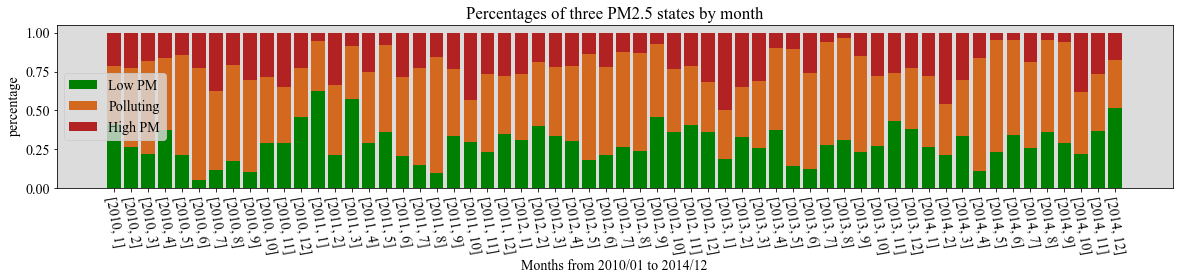

In [12]:
#画柱形图
import numpy as np
import matplotlib.pyplot as plt

plt.rc('axes', grid = False)
plt.rc('figure',figsize = (20,3))
plt.rc('font',size = 14)
fig, ax = plt.subplots()
plt.rc('axes', grid = False)
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# width =0.15   # the width of the bars: can also be len(x) sequence

ind= [ str([int(2010+np.floor(i/12)),i%12+1]) for i in np.arange(0,60)] # x location
p1 = plt.bar(ind, low_month_percentage,  color='green')
p2 = plt.bar(ind, polluting_month_percentage,  color='chocolate',bottom=low_month_percentage)
p3 = plt.bar(ind, high_month_percentage,   color='firebrick', bottom=[i+j for i,j in zip(low_month_percentage,polluting_month_percentage)])

plt.xlabel('Months from 2010/01 to 2014/12') 
plt.ylabel('percentage')
plt.title('Percentages of three PM2.5 states by month' )

plt.xticks(ind,rotation=280)
legend = plt.legend((p1[0], p2[0], p3[0]), ('Low PM', 'Polluting', 'High PM'))

#### 每季度PM2.5比例 三分类 叠加柱形图

In [13]:
# 添加season季度属性
# 0:春 1：夏 2：秋（收获） 3：秋 4：冬
# 月份划分：4-5（春）  6-9（夏） 10（秋，但农民收获季） 11（秋，供暖） 12-3（冬，供暖）
is_spring = (3<data['month']) & (data['month']<=5)
is_summer = (5<data['month']) & (data['month']<=9)
is_autumn_1 = data['month']==10
is_autumn_2 = data['month']==11
is_winter = (data['month']==12) | (data['month']<=3)
data['season']=0
data['season'][is_spring]=0
data['season'][is_summer]=1
data['season'][is_autumn_1]=2
data['season'][is_autumn_2]=3
data['season'][is_winter]=4

C:\Users\86180\AppData\Local\Temp/ipykernel_16260/993699373.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['season'][is_spring]=0
C:\Users\86180\AppData\Local\Temp/ipykernel_16260/993699373.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['season'][is_summer]=1
C:\Users\86180\AppData\Local\Temp/ipykernel_16260/993699373.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['season'][is_autumn_1]=2
C:\Users\86180

In [14]:
#计算每季度三种状态比例

high_season_percentage=[]
polluting_season_percentage=[]
low_season_percentage=[]

groups = data[['is_high','is_polluting','is_low']].groupby(data['season'])
groups_list = list(groups)
#groups_list[0][0] #group dependency
#groups_list[0][1] #table for the first year

for i in range(5):
    num_high = list(groups_list[i][1]['is_high']).count(True)
    num_polluting = list(groups_list[i][1]['is_polluting']).count(True)
    num_low = list(groups_list[i][1]['is_low']).count(True)

    total_num_month = num_high+num_polluting+num_low

    high_season_percentage.append(num_high/total_num_month)
    polluting_season_percentage.append(num_polluting/total_num_month)
    low_season_percentage.append(num_low/total_num_month)

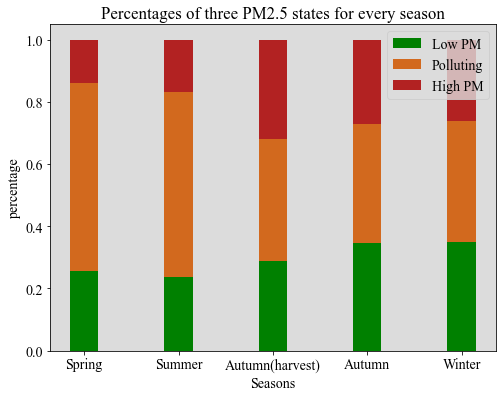

In [15]:
#画柱形图
import numpy as np
import matplotlib.pyplot as plt

plt.rc('axes', grid = False)
plt.rc('figure',figsize = (8,6))
plt.rc('font',size = 14)
fig, ax = plt.subplots()
plt.rc('axes', grid = False)
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

width =0.3   # the width of the bars: can also be len(x) sequence

ind= np.arange(0,5) # x location
p1 = plt.bar(ind, low_season_percentage,  color='green', width=width)
p2 = plt.bar(ind, polluting_season_percentage,  color='chocolate',bottom=low_season_percentage, width=width)
p3 = plt.bar(ind, high_season_percentage,   color='firebrick', bottom=[i+j for i,j in zip(low_season_percentage,polluting_season_percentage)], width=width)

plt.xlabel('Seasons') 
plt.ylabel('percentage')
plt.title('Percentages of three PM2.5 states for every season' )

plt.xticks(ticks=ind,labels=['Spring','Summer','Autumn(harvest)','Autumn','Winter'],rotation=0)
legend = plt.legend((p1[0], p2[0], p3[0]), ('Low PM', 'Polluting', 'High PM'))

## 风向-PM2.5 关系

#### Overview： 三分类 叠加柱形图

In [16]:
#计算每个风向三种状态比例

high_cbwd_percentage=[]
polluting_cbwd_percentage=[]
low_cbwd_percentage=[]

groups = data[['is_high','is_polluting','is_low']].groupby(data['cbwd'])
groups_list = list(groups)
#groups_list[0][0] #group dependency
#groups_list[0][1] #table for the type

for i in range(4):
    num_high = list(groups_list[i][1]['is_high']).count(True)
    num_polluting = list(groups_list[i][1]['is_polluting']).count(True)
    num_low = list(groups_list[i][1]['is_low']).count(True)

    total_num_month = num_high+num_polluting+num_low

    high_cbwd_percentage.append(num_high/total_num_month)
    polluting_cbwd_percentage.append(num_polluting/total_num_month)
    low_cbwd_percentage.append(num_low/total_num_month)

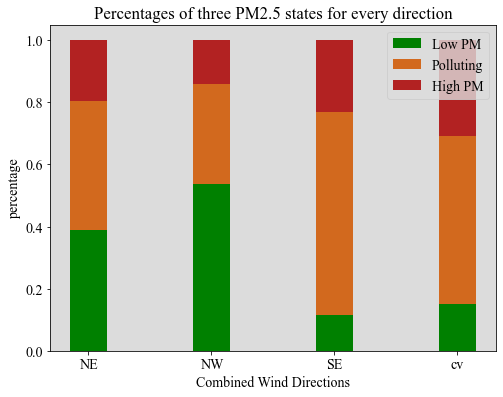

In [17]:
#画柱形图
import numpy as np
import matplotlib.pyplot as plt

plt.rc('axes', grid = False)
plt.rc('figure',figsize = (8,6))
plt.rc('font',size = 14)
fig, ax = plt.subplots()
plt.rc('axes', grid = False)
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

width =0.3   # the width of the bars: can also be len(x) sequence

ind= np.arange(0,4) # x location
p1 = plt.bar(ind, low_cbwd_percentage,  color='green', width=width)
p2 = plt.bar(ind, polluting_cbwd_percentage,  color='chocolate',bottom=low_cbwd_percentage, width=width)
p3 = plt.bar(ind, high_cbwd_percentage,   color='firebrick', bottom=[i+j for i,j in zip(low_cbwd_percentage,polluting_cbwd_percentage)], width=width)

plt.xlabel('Combined Wind Directions') 
plt.ylabel('percentage')
plt.title('Percentages of three PM2.5 states for every direction' )

plt.xticks(ticks=ind,labels=['NE','NW','SE','cv'],rotation=0)
legend = plt.legend((p1[0], p2[0], p3[0]), ('Low PM', 'Polluting', 'High PM'))

#### 不同风向下PM2.5分布：箱型图

Text(0.5, 1.0, 'Boxplots grouped by cbwd for every season')

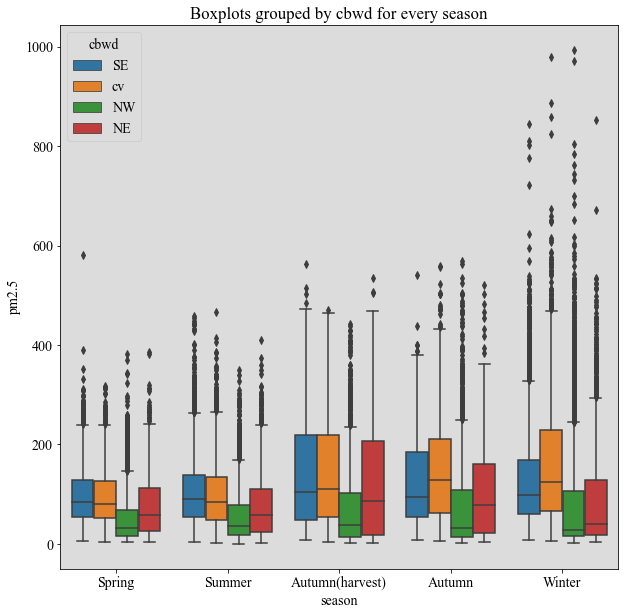

In [19]:
# 画箱图
import seaborn as sns
import matplotlib.pyplot as plt

fig,axes = plt.subplots()
plt.rc('figure',figsize = (10,10))
plt.rc('font',size = 14)
sns.boxplot(x='season',y='pm2.5', hue='cbwd',  data=data,orient='vertical',ax=axes)
# orient参数表示箱形图的方向
axes.set_xticklabels(['Spring','Summer','Autumn(harvest)','Autumn','Winter'])
axes.set_title('Boxplots grouped by cbwd for every season')
# fig.savefig('p5.png')    # 将绘制的图形保存为p5.png

#### 不同风向下PM2.5分布：提琴图

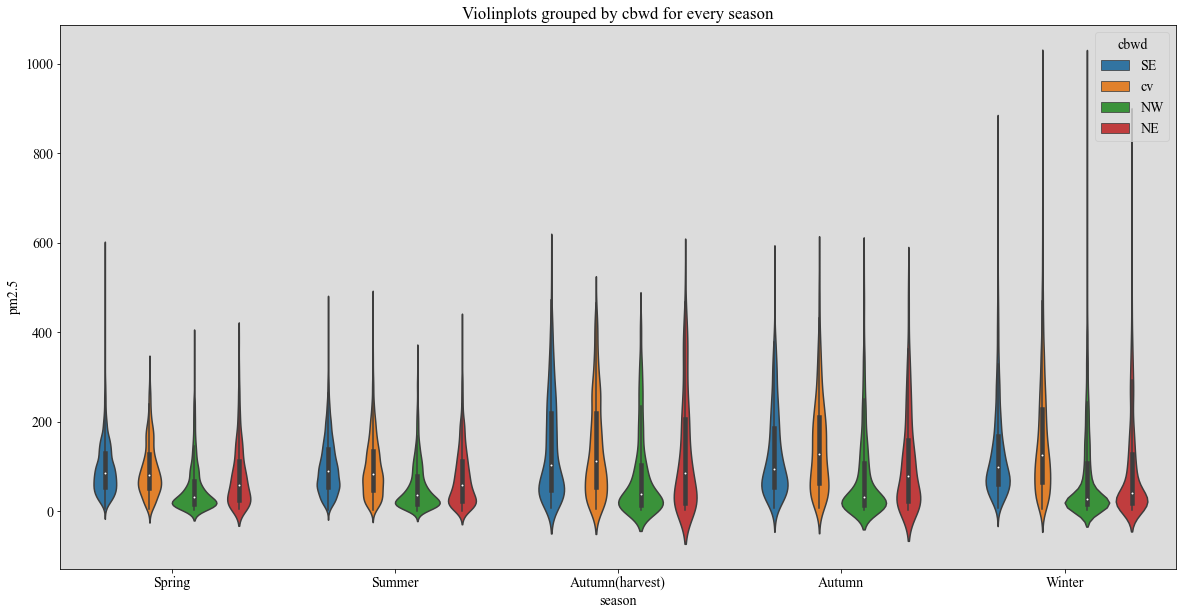

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

fig,axes = plt.subplots()
plt.rc('figure',figsize = (20,10))
plt.rc('font',size = 14)
sns.violinplot(x='season',y='pm2.5', hue='cbwd',  data=data,orient='vertical',ax=axes)
# orient参数表示图的方向
axes.set_xticklabels(['Spring','Summer','Autumn(harvest)','Autumn','Winter'])
axes.set_title('Violinplots grouped by cbwd for every season')

plt.show()